# What sells a car? - An EDA project

You're an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day. You need to study data collected over the last few years and determine which factors influence the price of a vehicle.

The purpose of this project is determining which factors affect the car's price most. To do so, I will analyse data collected during a few years, regarding vehicles' price, age, mileage, number of cylinders, condition and how long the ad was
active. In order to answer the project's main question, i will use visualization techniques as well as check for correlations, and adress issues arising from dealing with the raw data in pre-processing stages.  


## Initialization

In [1]:
# Loading all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import datetime as dt
import seaborn as sns



### Load data

In [2]:
# Load the data file into a DataFrame
try:
    cars = pd.read_csv(r'C:\Users\USER\OneDrive\מסמכים\DATA ANALYST\Practicum100\Exploratory Data Analysis (EDA)\פרוייקט 2\vehicles_us.csv')
except:
    cars = pd.read_csv('/datasets/vehicles_us.csv')

### Explore initial data

In [3]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
cars.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
price,51525.0,NaN,NaN,NaN,12132.46492,10040.803015,1.0,5000.0,9000.0,16839.0,375000.0
model_year,47906.0,NaN,NaN,NaN,2009.75047,6.282065,1908.0,2006.0,2011.0,2014.0,2019.0
model,51525,100,ford f-150,2796,NaN,NaN,NaN,NaN,NaN,NaN,NaN
condition,51525,6,excellent,24773,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cylinders,46265.0,NaN,NaN,NaN,6.125235,1.66036,3.0,4.0,6.0,8.0,12.0
fuel,51525,5,gas,47288,NaN,NaN,NaN,NaN,NaN,NaN,NaN
odometer,43633.0,NaN,NaN,NaN,115553.461738,65094.611341,0.0,70000.0,113000.0,155000.0,990000.0
transmission,51525,3,automatic,46902,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,51525,13,SUV,12405,NaN,NaN,NaN,NaN,NaN,NaN,NaN
paint_color,42258,12,white,10029,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# print a sample of data

cars.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


In [6]:
cars.duplicated().sum()

0

[Describe what you notice in the general information and the printed data sample. Are there any issues that may need further investigation and changes?]
A few issues:  1. DF includes 51525 rows and 13 columns.
               2. MV(Missing values) were found in 5 variables: model_year, cylinders, odometer, paint_color, is_4wd.
               3. price- min price seems odd (1), while max is exceptionally high compared to the distribution. std is huge..
               4. model_year- min year needs to be checked (1908?)
               5. odometer- max value is really high compared to mean and 75%. I would check for outliers.
               6. is_4wd is a boolean variable that was a assigned a 'float64' type. maybe by mistake?
               7. days_listed: is max value real or an outlier?
               8. No duplicated rows were found

[Are there columns with inappropriate data types?]

<< is_4wd >>
maybe "date_posted" should also be a numeric type value, and not "object"...

In [7]:
#share of missing values:
cars.isnull().sum()/len(cars)

price           0.000000
model_year      0.070238
model           0.000000
condition       0.000000
cylinders       0.102086
fuel            0.000000
odometer        0.153168
transmission    0.000000
type            0.000000
paint_color     0.179854
is_4wd          0.503697
date_posted     0.000000
days_listed     0.000000
dtype: float64

### Conclusions and further steps
Missing values were found for 5 variables, ranging between 7% (model_year) and 50.37% (is_4wd).
apart from model_year, the other variables are missing more than 10% of their values, and need to be addressed.
Maybe cross-referencing data from "model", "transmission", "cylinders" and "fuel" could help fill in the missing values. 
From intial inspection of data, there are a few issues that need to be addressed before we can arrive at analysing our data:
- Decreasing missing values rate, especially for is_4wd.
- Cheaking for possible outliers in price, days_listed, model_year and odometer.
- Changing data_type for is_4wd.


## Treat missing values (if any)

[Study missing values for each column in more details and decide what to do with them based on meaningful hypotheses.]

#First- some assistive variables

In [8]:
cars['year_posted'] = pd.to_datetime(cars['date_posted']).dt.year


In [9]:
cars['month_posted'] = pd.to_datetime(cars['date_posted']).dt.month
cars[['date_posted', 'year_posted','month_posted']]

,date_posted,year_posted,month_posted
0,2018-06-23,2018,6
1,2018-10-19,2018,10
2,2019-02-07,2019,2
3,2019-03-22,2019,3
4,2019-04-02,2019,4
...,...,...,...
51520,2018-10-03,2018,10
51521,2018-11-14,2018,11
51522,2018-11-15,2018,11
51523,2018-07-02,2018,7


### model_year missing values:

In [10]:


model_year_missing= cars[cars.model_year.isnull()]
model_year_not_missing =  cars[cars['model_year'].notna()]


In [11]:
model_year_missing.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
price,3619.0,NaN,NaN,NaN,11761.815142,9465.731785,1.0,4995.0,8980.0,15995.0,109999.0
model_year,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model,3619,100,ford f-150,191,NaN,NaN,NaN,NaN,NaN,NaN,NaN
condition,3619,6,excellent,1699,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cylinders,3256.0,NaN,NaN,NaN,6.111486,1.671348,3.0,4.0,6.0,8.0,10.0
fuel,3619,4,gas,3301,NaN,NaN,NaN,NaN,NaN,NaN,NaN
odometer,3070.0,NaN,NaN,NaN,117244.920847,63403.39757,0.0,73389.5,114135.5,155577.5,415371.0
transmission,3619,3,automatic,3310,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,3619,12,SUV,919,NaN,NaN,NaN,NaN,NaN,NaN,NaN
paint_color,2967,12,white,705,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
model_year_not_missing.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
price,47906.0,NaN,NaN,NaN,12160.465203,10082.453773,1.0,5000.0,9000.0,16900.0,375000.0
model_year,47906.0,NaN,NaN,NaN,2009.75047,6.282065,1908.0,2006.0,2011.0,2014.0,2019.0
model,47906,100,ford f-150,2605,NaN,NaN,NaN,NaN,NaN,NaN,NaN
condition,47906,6,excellent,23074,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cylinders,43009.0,NaN,NaN,NaN,6.126276,1.65954,3.0,4.0,6.0,8.0,12.0
fuel,47906,5,gas,43987,NaN,NaN,NaN,NaN,NaN,NaN,NaN
odometer,40563.0,NaN,NaN,NaN,115425.444099,65219.802462,0.0,70000.0,113000.0,155000.0,990000.0
transmission,47906,3,automatic,43592,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,47906,13,truck,11517,NaN,NaN,NaN,NaN,NaN,NaN,NaN
paint_color,39291,12,white,9324,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#would love your help: I wanted to present graphs for each column, showing superimposed graphs of both sliced. How can this be done? I tried it for hours, and nothing.. I was able to do it for one column at a time, but couldn't automate it and run it through a loop. This is what i wrote for the price column:

model_year_not_missing['price'].hist(range= (0,100000))
model_year_missing['price'].hist(range= (0,100000))

In [13]:
# looking into the difference in type:
model_year_missing['type'].value_counts()/len(model_year_missing)


SUV            0.253938
sedan          0.234319
truck          0.231003
pickup         0.139265
coupe          0.040066
wagon          0.030395
mini-van       0.023763
hatchback      0.020171
van            0.010776
convertible    0.007461
other          0.006079
offroad        0.002763
Name: type, dtype: float64

In [14]:
model_year_not_missing['type'].value_counts()/len(model_year_not_missing)

truck          0.240408
SUV            0.239761
sedan          0.236004
pickup         0.135348
coupe          0.045047
wagon          0.029871
mini-van       0.022440
hatchback      0.020331
van            0.012399
convertible    0.008746
other          0.004885
offroad        0.004258
bus            0.000501
Name: type, dtype: float64

#Looks like the distributions of both slices are similar, except for possible outliers in model_year_not_missing, in price and odometer. The top type is different, but doesn't seem to be significant. It seems that the missing values are random.

In [15]:
#filling missing values:
cars['model_year_filled'] = cars['model_year'].fillna(cars.groupby(['model','condition'])['model_year'].transform('median'))
cars[['model_year', 'model_year_filled']].isnull().sum()

model_year           3619
model_year_filled       6
dtype: int64

In [16]:
#trying a simpler model to fill all nans:
cars['model_year_filled'] = cars['model_year_filled'].fillna(cars.groupby('model')['model_year'].transform('median'))
cars[['model_year', 'model_year_filled']].isnull().sum()

model_year           3619
model_year_filled       0
dtype: int64

In [17]:
# checking wierd min values: since only 2 of them, i won't bother checking deeper
cars.model_year_filled.value_counts()[1908.0]

2

In [18]:
# Additional checking:
#cars.query('model_year_filled > year_posted')
cars['model_year_filled'].where(cars['model_year_filled'] < cars['year_posted'], '')

0        2011.0
1        2008.0
2        2013.0
3        2003.0
4        2017.0
          ...  
51520    2013.0
51521    2002.0
51522    2009.0
51523    2013.0
51524    2014.0
Name: model_year_filled, Length: 51525, dtype: object

In [19]:
cars['model_year_filled'].isnull().sum()

0

### cylinders missing values:

In [20]:

cylinders_missing= cars[cars.cylinders.isnull()]
cylinders_not_missing =  cars[cars.cylinders.notna()]

In [21]:
cylinders_missing.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
price,5260.0,NaN,NaN,NaN,12036.746008,10494.707681,1.0,5000.0,8997.0,16254.25,300000.0
model_year,4897.0,NaN,NaN,NaN,2009.657341,6.420406,1949.0,2006.0,2011.0,2014.0,2019.0
model,5260,100,ford f-150,316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
condition,5260,6,excellent,2599,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cylinders,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fuel,5260,5,gas,4826,NaN,NaN,NaN,NaN,NaN,NaN,NaN
odometer,4448.0,NaN,NaN,NaN,116617.246853,66302.857772,0.0,71719.25,113537.5,155000.0,990000.0
transmission,5260,3,automatic,4782,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,5260,13,truck,1265,NaN,NaN,NaN,NaN,NaN,NaN,NaN
paint_color,4310,12,white,979,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
cylinders_not_missing.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
price,46265.0,NaN,NaN,NaN,12143.347476,9987.951394,1.0,5000.0,9000.0,16900.0,375000.0
model_year,43009.0,NaN,NaN,NaN,2009.761073,6.266108,1908.0,2006.0,2011.0,2014.0,2019.0
model,46265,100,ford f-150,2480,NaN,NaN,NaN,NaN,NaN,NaN,NaN
condition,46265,6,excellent,22174,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cylinders,46265.0,NaN,NaN,NaN,6.125235,1.66036,3.0,4.0,6.0,8.0,12.0
fuel,46265,5,gas,42462,NaN,NaN,NaN,NaN,NaN,NaN,NaN
odometer,39185.0,NaN,NaN,NaN,115432.708485,64955.798512,0.0,70000.0,113000.0,155000.0,990000.0
transmission,46265,3,automatic,42120,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,46265,13,SUV,11181,NaN,NaN,NaN,NaN,NaN,NaN,NaN
paint_color,37948,12,white,9050,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# Distributions seem similar, so i conclude the missing are arbitraray.
##Filling missing values: 

cars['cylinders_filled'] = cars.groupby(['model', 'model_year_filled'])['cylinders'].transform(lambda x: x.fillna(x.median()))
cars[['cylinders_filled', 'cylinders']].isnull().sum()

cylinders_filled      29
cylinders           5260
dtype: int64

In [24]:
# for the 29 remaining missing values, i chose a simpler method:
cars['cylinders_filled'] = cars.groupby('model')['cylinders_filled'].transform(lambda x: x.fillna(x.median()))
cars[['cylinders_filled', 'cylinders']].isnull().sum()

cylinders_filled       0
cylinders           5260
dtype: int64

### odometer missing values:

In [25]:

odometer_missing= cars[cars.odometer.isnull()]
odometer_not_missing =  cars[cars.odometer.notna()]

In [26]:
odometer_missing.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
price,7892.0,NaN,NaN,NaN,12113.421059,10250.750279,1.0,5000.0,9000.0,16900.0,300000.0
model_year,7343.0,NaN,NaN,NaN,2009.783876,6.312851,1908.0,2006.0,2011.0,2014.0,2019.0
model,7892,100,ford f-150,419,NaN,NaN,NaN,NaN,NaN,NaN,NaN
condition,7892,6,excellent,3800,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cylinders,7080.0,NaN,NaN,NaN,6.099011,1.658583,3.0,4.0,6.0,8.0,12.0
fuel,7892,5,gas,7200,NaN,NaN,NaN,NaN,NaN,NaN,NaN
odometer,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
transmission,7892,3,automatic,7186,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,7892,13,sedan,1901,NaN,NaN,NaN,NaN,NaN,NaN,NaN
paint_color,6437,12,white,1497,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
odometer_not_missing.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
price,43633.0,NaN,NaN,NaN,12135.909426,10002.474405,1.0,5000.0,9000.0,16800.0,375000.0
model_year,40563.0,NaN,NaN,NaN,2009.744422,6.276535,1908.0,2006.0,2011.0,2014.0,2019.0
model,43633,99,ford f-150,2377,NaN,NaN,NaN,NaN,NaN,NaN,NaN
condition,43633,6,excellent,20973,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cylinders,39185.0,NaN,NaN,NaN,6.129973,1.660658,3.0,4.0,6.0,8.0,12.0
fuel,43633,5,gas,40088,NaN,NaN,NaN,NaN,NaN,NaN,NaN
odometer,43633.0,NaN,NaN,NaN,115553.461738,65094.611341,0.0,70000.0,113000.0,155000.0,990000.0
transmission,43633,3,automatic,39716,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,43633,13,SUV,10511,NaN,NaN,NaN,NaN,NaN,NaN,NaN
paint_color,35821,12,white,8532,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
#Distributions seem similar, but min value seems strange: Looking into odometer=0. found 185 such values:

cars['odometer'].value_counts()[0.0]


185

In [29]:
# Looking more closely at these rows:

zero_odometer=cars.query('odometer == 0.0')
zero_odometer.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,model_year_filled,cylinders_filled
352,7997,2009.0,gmc yukon,excellent,8.0,gas,0.0,automatic,SUV,white,1.0,2019-03-16,88,2019,3,2009.0,8.0
814,2995,1999.0,ford f-150,good,6.0,gas,0.0,manual,truck,NaN,NaN,2019-03-14,16,2019,3,1999.0,6.0
1375,5888,NaN,toyota 4runner,good,6.0,gas,0.0,automatic,SUV,black,NaN,2019-02-22,36,2019,2,2004.0,6.0
1461,1000,1992.0,gmc sierra 1500,good,8.0,gas,0.0,automatic,truck,NaN,NaN,2018-09-28,47,2018,9,1992.0,8.0
1970,10988,2000.0,ford f-250 sd,good,8.0,diesel,0.0,automatic,truck,white,1.0,2018-11-21,39,2018,11,2000.0,8.0
2049,30000,1969.0,chevrolet corvette,excellent,8.0,other,0.0,automatic,convertible,white,NaN,2018-08-01,20,2018,8,1969.0,8.0
2077,11888,2010.0,chevrolet silverado 1500,good,8.0,gas,0.0,automatic,truck,white,NaN,2018-07-02,24,2018,7,2010.0,8.0
2506,3000,2006.0,honda civic,good,NaN,gas,0.0,automatic,sedan,silver,NaN,2018-06-02,37,2018,6,2006.0,4.0
3640,4200,NaN,nissan murano,good,6.0,gas,0.0,automatic,SUV,red,1.0,2018-08-24,21,2018,8,2009.0,6.0
4186,11888,2010.0,chevrolet silverado 1500,good,8.0,gas,0.0,automatic,truck,white,NaN,2018-12-06,71,2018,12,2010.0,8.0


It seems strange having cars for sale from 1969 that have zero milage on them, so i decide to drop these rows.

In [30]:
#two versions: cars = cars[cars.odometer != 0.0]
cars.drop(cars.index[cars['odometer'] == 0], inplace = True)

In [31]:
#checking...
no_odometer=cars.query('odometer == 0.0')
no_odometer.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,model_year_filled,cylinders_filled


<AxesSubplot:>

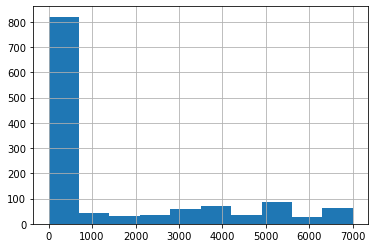

In [32]:
# A further check: the quartiles don't give an adequate picture- a crazy outlier might affect our attempt to fill in the missing values. 
odometer_not_missing['odometer'].hist(range= (0,7000))

<AxesSubplot:>

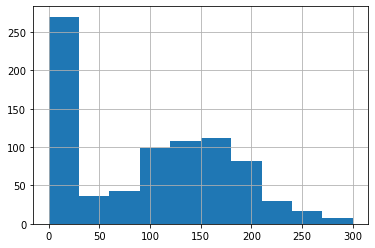

In [33]:
odometer_not_missing['odometer'].hist(range= (0,300))

<AxesSubplot:>

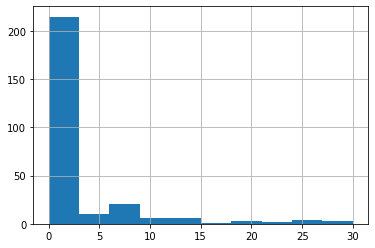

In [34]:
odometer_not_missing['odometer'].hist(range= (0,30))

In [35]:
cars.query('odometer <= 3')['odometer'].count()

31

In [36]:
cars.query('odometer <= 3')[['odometer', 'model_year_filled', 'year_posted']]

,odometer,model_year_filled,year_posted
3695,1.0,1992.0,2018
13429,1.0,2006.0,2019
15164,1.0,2002.0,2018
18258,1.0,2012.0,2018
18405,1.0,2010.0,2019
20130,1.0,2014.0,2019
20540,2.0,2005.0,2018
20542,3.0,2011.0,2019
21042,1.0,2006.0,2018
21094,1.0,2008.0,2018


None of these low milages make any sense, so i decide to drop all these rows (=30).

In [37]:
# drop odometer <= 3  :
cars.drop(cars.index[cars['odometer'] <= 3], inplace = True)

In [38]:
#creating "car_age"- an assistive variable:
#cars['car_age'] = cars['year_posted'] + (cars['month_posted']/12) - cars['model_year_filled']
cars['car_age'] = cars['year_posted'] - cars['model_year_filled'] +1

In [39]:
# filling missing values for odometer:
cars['odometer_filled'] = cars.groupby(['model_year_filled', 'car_age'])['odometer'].transform(lambda x: x.fillna(x.median()))
cars[['odometer_filled', 'odometer']].isnull().sum()


odometer_filled       2
odometer           7892
dtype: int64

<AxesSubplot:>

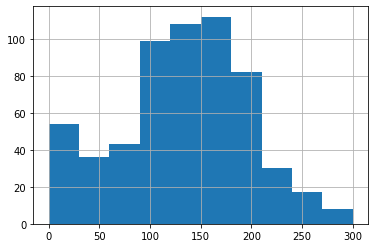

In [40]:
cars['odometer_filled'].hist(range= (0,300))

### paint_color missing values:

In [41]:

paint_color_missing= cars[cars.paint_color.isnull()]
paint_color_not_missing =  cars[cars.paint_color.notna()]

In [42]:
paint_color_missing.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
price,9230.0,NaN,NaN,NaN,12188.239978,9606.928448,1.0,5200.0,9450.0,16995.0,189000.0
model_year,8579.0,NaN,NaN,NaN,2009.829467,6.226523,1958.0,2006.0,2011.0,2014.0,2019.0
model,9230,100,ford f-150,473,NaN,NaN,NaN,NaN,NaN,NaN,NaN
condition,9230,6,excellent,4413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cylinders,8284.0,NaN,NaN,NaN,6.129768,1.663882,3.0,4.0,6.0,8.0,10.0
fuel,9230,5,gas,8489,NaN,NaN,NaN,NaN,NaN,NaN,NaN
odometer,7775.0,NaN,NaN,NaN,115103.913055,63450.547935,5.0,70000.0,112244.0,154000.0,811956.0
transmission,9230,3,automatic,8367,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,9230,13,SUV,2229,NaN,NaN,NaN,NaN,NaN,NaN,NaN
paint_color,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
paint_color_not_missing.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
price,42079.0,NaN,NaN,NaN,12139.902968,10141.699581,1.0,4999.0,9000.0,16797.0,375000.0
model_year,39124.0,NaN,NaN,NaN,2009.750716,6.263195,1908.0,2006.0,2011.0,2014.0,2019.0
model,42079,100,ford f-150,2313,NaN,NaN,NaN,NaN,NaN,NaN,NaN
condition,42079,6,excellent,20287,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cylinders,37787.0,NaN,NaN,NaN,6.125149,1.659092,3.0,4.0,6.0,8.0,12.0
fuel,42079,5,gas,38605,NaN,NaN,NaN,NaN,NaN,NaN,NaN
odometer,35642.0,NaN,NaN,NaN,116351.810701,65019.997114,5.0,71000.0,113604.0,155500.0,990000.0
transmission,42079,3,automatic,38336,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,42079,13,truck,10180,NaN,NaN,NaN,NaN,NaN,NaN,NaN
paint_color,42079,12,white,9983,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#Didn't identify any differences. 
##i am not sure we can truely use another variable to help us guess the color. I used to mode method for the practice, but maybe it's best to leave these values 'unknown'(?)


In [44]:
for row in ['paint_color']:
    cars['paint_color_filled']= cars['paint_color'].fillna(cars['paint_color'].mode()[0])
cars[['paint_color', 'paint_color_filled']].head(10)

,paint_color,paint_color_filled
0,NaN,white
1,white,white
2,red,red
3,NaN,white
4,black,black
5,black,black
6,white,white
7,black,black
8,NaN,white
9,blue,blue


In [45]:
cars[['paint_color', 'paint_color_filled']].isnull().sum()

paint_color           9230
paint_color_filled       0
dtype: int64

### is_4wd missing values:

In [46]:
is_4wd_missing = cars[cars.is_4wd.isnull()]
is_4wd_not_missing = cars[cars.is_4wd.notna()]

In [47]:
is_4wd_not_missing.is_4wd.value_counts()

1.0    25513
Name: is_4wd, dtype: int64

In [48]:
# All values are '1', so i will change the NaN to '0':

cars['is_4wd_filled']= cars.is_4wd.fillna('0')
cars['is_4wd_filled'].value_counts()                            

0      25796
1.0    25513
Name: is_4wd_filled, dtype: int64

## Fix data types

[As the data is more or less complete now, fix the data types if required.]

In [49]:
cars['is_4wd_filled']= cars['is_4wd_filled'].astype('bool')

In [50]:
cars['model_year_filled'] = cars['model_year_filled'].astype(int)
cars['model_year_filled']

0        2011
1        2008
2        2013
3        2003
4        2017
         ... 
51520    2013
51521    2002
51522    2009
51523    2013
51524    2014
Name: model_year_filled, Length: 51309, dtype: int32

## Enrich data

In [51]:
# Add the vehicle's average mileage per year

cars['mileage_per_year'] = cars['odometer_filled'] / cars['car_age']
cars[['mileage_per_year', 'odometer_filled', 'car_age']].sort_values(by='car_age', ascending=True).head(10)

,mileage_per_year,odometer_filled,car_age
37811,28000.0,28000.0,1.0
34497,15630.0,15630.0,1.0
21031,3411.0,3411.0,1.0
2919,28000.0,28000.0,1.0
8965,72677.0,72677.0,1.0
8962,28000.0,28000.0,1.0
15134,42114.0,42114.0,1.0
34462,5499.0,5499.0,1.0
48164,23565.0,23565.0,1.0
41297,27000.0,27000.0,1.0


In [52]:
# Replacing the condition values with something that can be manipulated more easily- a dictionary variable
cars['condition'].unique()



array(['good', 'like new', 'fair', 'excellent', 'salvage', 'new'],
      dtype=object)

In [53]:
condition_dict = {
                'new': 1,
                'excellent':2,
                'like new':3,
                'good':4,
                'fair':5,
                'salvage':6

}

In [54]:
condition_dict.keys()


dict_keys(['new', 'excellent', 'like new', 'good', 'fair', 'salvage'])

In [55]:
condition_dict.values()

dict_values([1, 2, 3, 4, 5, 6])

In [56]:
cars['condition_category'] = cars['condition'].replace(condition_dict)
cars.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,...,year_posted,month_posted,model_year_filled,cylinders_filled,car_age,odometer_filled,paint_color_filled,is_4wd_filled,mileage_per_year,condition_category
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,...,2018,6,2011,6.0,8.0,145000.0,white,True,18125.000000,4
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,...,2018,10,2008,6.0,11.0,88705.0,white,True,8064.090909,4
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,...,2019,2,2013,4.0,7.0,110000.0,red,True,15714.285714,3
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,...,2019,3,2003,8.0,17.0,156374.0,white,True,9198.470588,5
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,...,2019,4,2017,4.0,3.0,80903.0,black,True,26967.666667,2


## Check clean data

In [57]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51309 entries, 0 to 51524
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   price               51309 non-null  int64  
 1   model_year          47703 non-null  float64
 2   model               51309 non-null  object 
 3   condition           51309 non-null  object 
 4   cylinders           46071 non-null  float64
 5   fuel                51309 non-null  object 
 6   odometer            43417 non-null  float64
 7   transmission        51309 non-null  object 
 8   type                51309 non-null  object 
 9   paint_color         42079 non-null  object 
 10  is_4wd              25513 non-null  float64
 11  date_posted         51309 non-null  object 
 12  days_listed         51309 non-null  int64  
 13  year_posted         51309 non-null  int64  
 14  month_posted        51309 non-null  int64  
 15  model_year_filled   51309 non-null  int32  
 16  cyli

In [58]:
cars.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
price,51309.0,NaN,NaN,NaN,12148.598336,10047.524906,1.0,5000.0,9000.0,16900.0,375000.0
model_year,47703.0,NaN,NaN,NaN,2009.764879,6.256623,1908.0,2006.0,2011.0,2014.0,2019.0
model,51309,100,ford f-150,2786,NaN,NaN,NaN,NaN,NaN,NaN,NaN
condition,51309,6,excellent,24700,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cylinders,46071.0,NaN,NaN,NaN,6.125979,1.659937,3.0,4.0,6.0,8.0,12.0
fuel,51309,5,gas,47094,NaN,NaN,NaN,NaN,NaN,NaN,NaN
odometer,43417.0,NaN,NaN,NaN,116128.340535,64742.786446,5.0,70849.0,113412.0,155134.0,990000.0
transmission,51309,3,automatic,46703,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,51309,13,SUV,12363,NaN,NaN,NaN,NaN,NaN,NaN,NaN
paint_color,42079,12,white,9983,NaN,NaN,NaN,NaN,NaN,NaN,NaN


[Given the data is ready for the analysis, take just another quick look at it. It is helpful to see what exactly you are going to use for the analysis.]

## Study core parameters

[Choose an appropriate approach to study the parameters listed below, pay special attention to how outliers affect the form and readability of the histograms.]

The parameters are
- Price
- The vehicle's age when the ad was placed
- Mileage
- Number of cylinders
- Condition

In [59]:
# A function that presents the distribution of each parameter and suggests outlier according to percentile cut-offs:
# (I chose using percentiles rather than IQR because i saw that there were no normal distributions and i prefered not 
# to deal with the theoretical false values..) )

def distribution_percentile (parameter):
    print('The boxplot of: {}'.format(parameter))
    bxplt= sns.boxplot(x=cars[parameter])
    plt.show() 
    if cars[parameter].mean()>cars[parameter].median():
        print('The distribution is skewed to the right')
    else:
        print('The distribution is skewed to the left')
    print('---------------------------------------')
    print('Statistics on: {}'.format(parameter))
    print(cars[parameter].describe())
    ninety_five = np.percentile(cars[parameter], 95)
    five = np.percentile(cars[parameter], 5)
    print('---------------------------------------')
    print('min border:',five)
    print('max border:',ninety_five)
    print('---------------------------------------')
    print('The outliers are probably values below',five, "and above",ninety_five)
    print('We have',len(cars[(cars[parameter]<five)|(cars[parameter]>ninety_five)]),"values that we can consider outliers")
    print()
    print()



The boxplot of: price


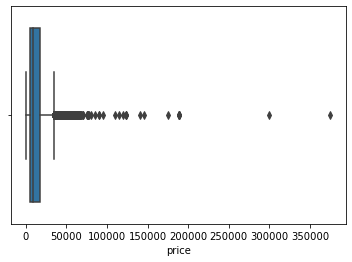

The distribution is skewed to the right
---------------------------------------
Statistics on: price
count     51309.000000
mean      12148.598336
std       10047.524906
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16900.000000
max      375000.000000
Name: price, dtype: float64
---------------------------------------
min border: 1950.0
max border: 30479.599999999977
---------------------------------------
The outliers are probably values below 1950.0 and above 30479.599999999977
We have 5106 values that we can consider outliers


The boxplot of: car_age


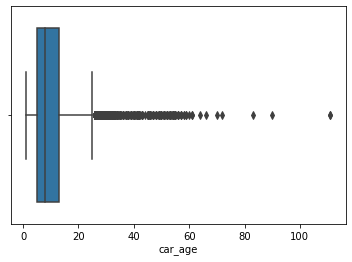

The distribution is skewed to the right
---------------------------------------
Statistics on: car_age
count    51309.000000
mean         9.507494
std          6.118436
min          1.000000
25%          5.000000
50%          8.000000
75%         13.000000
max        111.000000
Name: car_age, dtype: float64
---------------------------------------
min border: 2.0
max border: 20.0
---------------------------------------
The outliers are probably values below 2.0 and above 20.0
We have 4218 values that we can consider outliers


The boxplot of: mileage_per_year


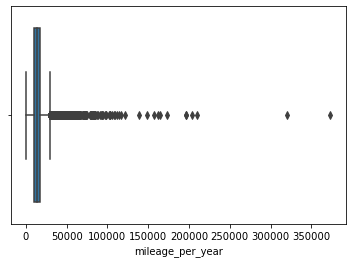

The distribution is skewed to the right
---------------------------------------
Statistics on: mileage_per_year
count     51307.000000
mean      14587.766998
std        8633.682250
min           0.285714
25%        9866.828205
50%       13300.444444
75%       17700.000000
max      373200.000000
Name: mileage_per_year, dtype: float64
---------------------------------------
min border: nan
max border: nan
---------------------------------------
The outliers are probably values below nan and above nan
We have 0 values that we can consider outliers


The boxplot of: cylinders_filled


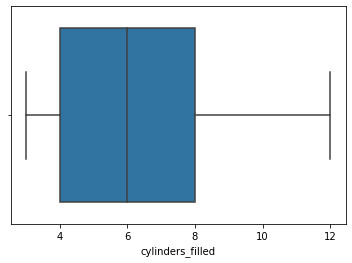

The distribution is skewed to the right
---------------------------------------
Statistics on: cylinders_filled
count    51309.000000
mean         6.120905
std          1.656882
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders_filled, dtype: float64
---------------------------------------
min border: 4.0
max border: 8.0
---------------------------------------
The outliers are probably values below 4.0 and above 8.0
We have 598 values that we can consider outliers


The boxplot of: condition_category


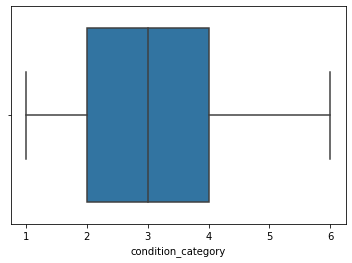

The distribution is skewed to the left
---------------------------------------
Statistics on: condition_category
count    51309.000000
mean         2.972305
std          1.013221
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: condition_category, dtype: float64
---------------------------------------
min border: 2.0
max border: 4.0
---------------------------------------
The outliers are probably values below 2.0 and above 4.0
We have 1855 values that we can consider outliers




In [60]:
# Calling the function via a loop:
for parameter in ['price', 'car_age', 'mileage_per_year', 'cylinders_filled', 'condition_category']:
    distribution_percentile(parameter)



In [61]:
# trying to figure out why for mileage_per_year there are NaNs instead of suggested outliers:
five = np.nanpercentile(cars['mileage_per_year'], 5)
ninty_five = np.nanpercentile(cars['mileage_per_year'], 95)
five, ninty_five

(4588.235294117647, 28705.899999999998)

Hi Olga, I have no idea why i needed the nanpercentile for odometer and mileage, and not for the other variables.. do you?

## Study and treat outliers

[Given the results above, determine what columns may contain outliers, and create a DataFrame without those outliers. Hint: Outliers can be identified by defining the lower/upper limits for normal range of values.]

<< From what i understand, price, car_age and milage_per_year have outliers that need to be considered. Cylinders and condition seem reasonable to me.
Running the outlier filter once with a 5%-95% cutoff point didn't leave much data, so i decided to go for a 2%-98% cut-off criteria.
Price-  I suggest dropping 2% from the low-values, that make least sense to me, and 2% from the high-values (because the max values are very far apart from the distribution).
car_age- mean and median are pretty close to each other, but the std. is quite large. The minimal value makes sense to me, but the max value (110 years)- doesn't. I would suggest to consider only the top 2% as outliers, and leaving the bottom values as they are.
odometer/mileage: this was a column difficult to understand, as a lot of the values seem really small: there are old cars with low milage and new cars with a lot of milage... I would suggest to cut off both ends of the distribution, and consider these values outliers. (but maybe i am wrong.. not easy to decide to drop data..).

In [62]:
# Determine the lower limits for outliers
two=np.percentile(cars[parameter],2)


In [63]:
# Determine the upper limits for outliers
ninty_eight=np.percentile(cars[parameter],98)



In [64]:
border_list=[]
for parameter in ['price','car_age']:
    two = round(np.percentile(cars[parameter], 2), 2)
    ninety_eight = round(np.percentile(cars[parameter], 98), 2)
    border_list.append([parameter,two,ninety_eight])
border_list

[['price', 399.0, 37995.0], ['car_age', 1.0, 24.0]]

In [65]:
border_list2=[]
for parameter in ['odometer_filled', 'mileage_per_year']:
    two = round(np.nanpercentile(cars[parameter], 2), 2)
    ninety_eight = round(np.nanpercentile(cars[parameter], 98), 2)
    border_list2.append([parameter,two,ninety_eight])
border_list2

[['odometer_filled', 6886.0, 251250.8], ['mileage_per_year', 1634.13, 37000.0]]

In [66]:
border_list.extend(border_list2)
border_data = pd.DataFrame(border_list, columns=['parameter','2nd%','98th%'])
border_data


,parameter,2nd%,98th%
0,price,399.00,37995.0
1,car_age,1.00,24.0
2,odometer_filled,6886.00,251250.8
3,mileage_per_year,1634.13,37000.0


In [67]:
# Store data without outliers in a separate DataFrame
#creating a duplicate DF:
cars_filtered = cars.copy()


In [68]:
# changing the values according to the limits established:
cars_filtered = cars_filtered[(cars_filtered['price']>399)&(cars_filtered['price']<37995)]
cars_filtered = cars_filtered[cars_filtered['car_age']<24]
cars_filtered = cars_filtered[(cars_filtered['odometer_filled']>6886.00)&(cars_filtered['odometer_filled']<251000)]
cars_filtered = cars_filtered[(cars_filtered['mileage_per_year']>1634.13)&(cars_filtered['mileage_per_year']<37000)]        


In [69]:
#checking:
cars_filtered[['price', 'car_age', 'odometer_filled', 'mileage_per_year']].describe()

,price,car_age,odometer_filled,mileage_per_year
count,45501.000000,45501.000000,45501.000000,45501.000000
mean,11705.228698,9.280466,116718.195919,14193.882414
std,8052.113220,4.858294,52063.877302,5917.850918
min,400.000000,1.000000,6893.000000,1640.250000
25%,5495.000000,6.000000,79167.000000,10175.000000
50%,9400.000000,9.000000,117835.000000,13282.250000
75%,16000.000000,13.000000,152194.000000,17224.000000
max,37990.000000,23.000000,250870.000000,36944.666667


## Study core parameters without outliers

[Use the filtered data to make new plots. Compare with the earlier ones (that included outliers). Draw conclusions for each.]

<AxesSubplot:>

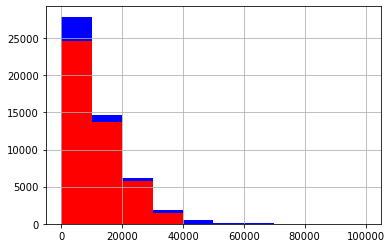

In [70]:
cars['price'].hist(range= (0,100000), color='blue')
cars_filtered['price'].hist(range= (0,100000), color='red')


<AxesSubplot:>

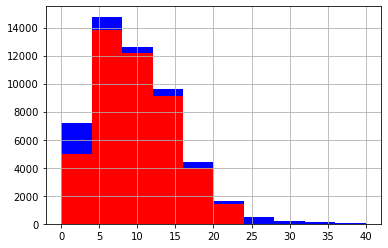

In [71]:
cars['car_age'].hist(range= (0,40), color='blue')
cars_filtered['car_age'].hist(range= (0,40), color='red')

<AxesSubplot:>

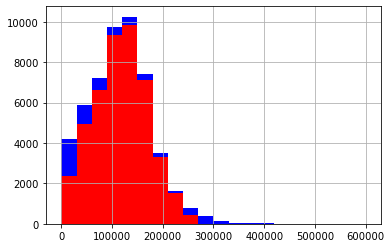

In [72]:
cars['odometer_filled'].hist(range= (0,600000), color='blue', bins=20)
cars_filtered['odometer_filled'].hist(range= (0,600000), color='red', bins=20)

<AxesSubplot:>

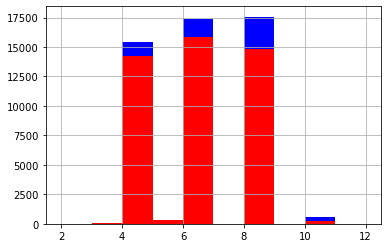

In [73]:
cars['cylinders_filled'].hist(range= (2,12), color='blue')
cars_filtered['cylinders_filled'].hist(range= (2,12), color='red')

<AxesSubplot:>

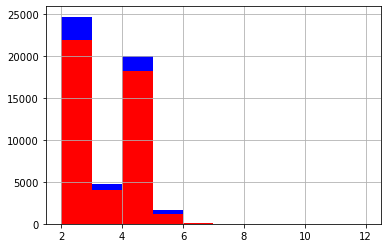

In [74]:
cars['condition_category'].hist(range= (2,12), color='blue')
cars_filtered['condition_category'].hist(range= (2,12), color='red')

### conclusions:
Looking at the histograms of the 3 variables i had worked on, shows how the general shape of the distribution is more or less the same as before, only the frequencies of the values are lowered. It is noticeable especially in the lower and higher values, where outliers were removed, but can also be detected in the middle of the distribution.
A similar pattern of lowered frequencies is seen also in 'condition' and 'cylinder' variables, though i have not dropped any outliers there. This might be due to the fact that the N is smaller now, hence affecting frequency counts across the whole value range.
All in all, i have remove 17157  rows:  51525- 34368
33% of the DF (which sound not so good...)

## Ads lifetime

[Study how many days advertisements were displayed (`days_listed`). Calculate the mean and median. Describe the typical lifetime of an ad. Determine when ads were removed quickly, and when they were listed for an abnormally long time.]

In [75]:
#days_listed distribution: mean>median. A right-tailed distribution
cars_filtered['days_listed'].describe()

count    45501.000000
mean        39.552515
std         28.208497
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

In [76]:
cars_filtered.pivot_table(index='type', values='days_listed', aggfunc=['median', 'mean']).reset_index()
# Looks like all vehicle type ads are posted for a similar amount of time, except for buses that need to be posted twice as long before they are sold.

,type,median,mean
,,days_listed,days_listed
0,SUV,33,39.768444
1,bus,49,44.619048
2,convertible,33,38.442244
3,coupe,33,39.544093
4,hatchback,35,40.682824
5,mini-van,33,39.170932
6,offroad,32,40.028902
7,other,32,37.511521
8,pickup,33,39.272337


In [77]:
#adding a count function. It doesn't seem like 3 buses can explain the variance in the data.
days_listed_per_type = cars_filtered.pivot_table(index='type', values='days_listed', aggfunc=['count', 'median']).reset_index()
days_listed_per_type

,type,count,median
,,days_listed,days_listed
0,SUV,11250,33
1,bus,21,49
2,convertible,303,33
3,coupe,1803,33
4,hatchback,949,35
5,mini-van,1094,33
6,offroad,173,32
7,other,217,32
8,pickup,6055,33


In [78]:
# here i don't detect a clear difference between cars posted for a long/short time 
days_listed_pivot = cars_filtered.pivot_table(index=['type', 'price'], values='days_listed', aggfunc='median').reset_index().sort_values(by='days_listed', ascending = False)
days_listed_pivot

,type,price,days_listed
1820,coupe,8980,256.0
2818,offroad,12200,233.0
3333,pickup,11444,225.0
534,SUV,9885,203.0
6246,truck,33858,202.0
...,...,...,...
3115,pickup,4985,1.0
2124,hatchback,3650,0.0
2090,hatchback,1900,0.0
4887,sedan,17495,0.0


In [79]:
# subsetting according to Q1 and down vs. Q3 and up: Couldn't detect any difference.
sold_fast = cars_filtered.query('0 < days_listed < 19')
sold_slow = cars_filtered.query('53 < days_listed < 271') 
sold_slow.describe(include='all')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,...,year_posted,month_posted,model_year_filled,cylinders_filled,car_age,odometer_filled,paint_color_filled,is_4wd_filled,mileage_per_year,condition_category
count,11312.000000,10487.000000,11312,11312,10160.000000,11312,9514.000000,11312,11312,9304,...,11312.000000,11312.000000,11312.000000,11312.000000,11312.000000,11312.000000,11312,11312,11312.000000,11312.000000
unique,NaN,NaN,100,6,NaN,5,NaN,3,13,12,...,NaN,NaN,NaN,NaN,NaN,NaN,12,1,NaN,NaN
top,NaN,NaN,ford f-150,excellent,NaN,gas,NaN,automatic,SUV,white,...,NaN,NaN,NaN,NaN,NaN,NaN,white,True,NaN,NaN
freq,NaN,NaN,589,5448,NaN,10507,NaN,10429,2808,2125,...,NaN,NaN,NaN,NaN,NaN,NaN,4133,11312,NaN,NaN
mean,11687.643564,2010.007152,NaN,NaN,6.061614,NaN,117177.656716,NaN,NaN,NaN,...,2018.316655,6.559318,2010.035095,6.049903,9.280896,116761.220739,NaN,NaN,14171.309936,2.972330
std,7999.462936,4.922017,NaN,NaN,1.639273,NaN,53723.682959,NaN,NaN,NaN,...,0.465192,3.477782,4.817206,1.637222,4.826265,51913.362032,NaN,NaN,5888.159435,1.001296
min,422.000000,1996.000000,NaN,NaN,3.000000,NaN,6915.000000,NaN,NaN,NaN,...,2018.000000,1.000000,1996.000000,3.000000,1.000000,6915.000000,NaN,NaN,1640.250000,1.000000
25%,5495.000000,2007.000000,NaN,NaN,4.000000,NaN,78477.250000,NaN,NaN,NaN,...,2018.000000,3.000000,2007.000000,4.000000,6.000000,79663.000000,NaN,NaN,10153.500000,2.000000
50%,9500.000000,2011.000000,NaN,NaN,6.000000,NaN,116693.000000,NaN,NaN,NaN,...,2018.000000,7.000000,2011.000000,6.000000,9.000000,117566.000000,NaN,NaN,13275.700549,3.000000
75%,15999.000000,2014.000000,NaN,NaN,8.000000,NaN,154311.250000,NaN,NaN,NaN,...,2019.000000,10.000000,2014.000000,8.000000,13.000000,152284.000000,NaN,NaN,17266.237500,4.000000


In [80]:
sold_fast.describe(include='all')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,...,year_posted,month_posted,model_year_filled,cylinders_filled,car_age,odometer_filled,paint_color_filled,is_4wd_filled,mileage_per_year,condition_category
count,11045.000000,10258.000000,11045,11045,9892.000000,11045,9152.000000,11045,11045,9023,...,11045.000000,11045.000000,11045.000000,11045.000000,11045.000000,11045.000000,11045,11045,11045.000000,11045.000000
unique,NaN,NaN,100,6,NaN,4,NaN,3,13,12,...,NaN,NaN,NaN,NaN,NaN,NaN,12,1,NaN,NaN
top,NaN,NaN,ford f-150,excellent,NaN,gas,NaN,automatic,sedan,white,...,NaN,NaN,NaN,NaN,NaN,NaN,white,True,NaN,NaN
freq,NaN,NaN,611,5276,NaN,10252,NaN,10149,2733,2118,...,NaN,NaN,NaN,NaN,NaN,NaN,4140,11045,NaN,NaN
mean,11713.773472,2010.033437,NaN,NaN,6.019207,NaN,116290.311844,NaN,NaN,NaN,...,2018.306836,6.643640,2010.045541,6.018923,9.260661,116294.724943,NaN,NaN,14184.167735,2.982979
std,8048.260324,4.988194,NaN,NaN,1.631208,NaN,54329.529515,NaN,NaN,NaN,...,0.461201,3.500393,4.884339,1.630895,4.894385,52207.657626,NaN,NaN,5928.146170,1.009050
min,400.000000,1996.000000,NaN,NaN,3.000000,NaN,6915.000000,NaN,NaN,NaN,...,2018.000000,1.000000,1996.000000,3.000000,1.000000,6915.000000,NaN,NaN,1650.000000,1.000000
25%,5500.000000,2007.000000,NaN,NaN,4.000000,NaN,75706.000000,NaN,NaN,NaN,...,2018.000000,3.000000,2007.000000,4.000000,5.000000,79101.500000,NaN,NaN,10185.857143,2.000000
50%,9400.000000,2011.000000,NaN,NaN,6.000000,NaN,115614.000000,NaN,NaN,NaN,...,2018.000000,7.000000,2011.000000,6.000000,9.000000,118000.000000,NaN,NaN,13201.000000,3.000000
75%,16000.000000,2014.000000,NaN,NaN,8.000000,NaN,154064.250000,NaN,NaN,NaN,...,2019.000000,10.000000,2014.000000,8.000000,13.000000,152589.000000,NaN,NaN,17169.400000,4.000000


Text(0.5, 1.0, 'Comparison between prices of cars sold fast vs. slow')

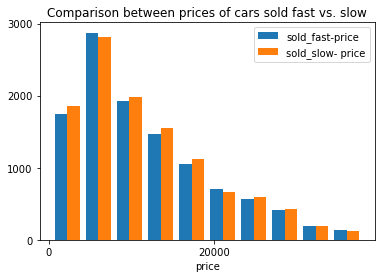

In [81]:

plt.hist([sold_fast.price.values.flatten(), sold_slow.price.values.flatten()], label=['sold_fast-price', 'sold_slow- price'])
plt.legend()
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)
plt.xlabel("price")
plt.title("Comparison between prices of cars sold fast vs. slow")

Text(0.5, 1.0, 'Comparison between mileages of cars sold fast vs. slow')

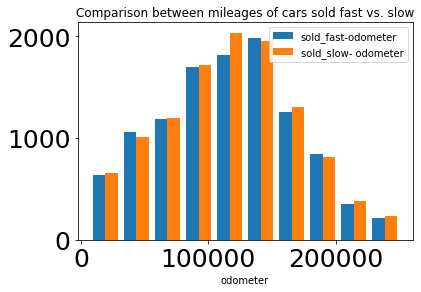

In [82]:
plt.hist([sold_fast.odometer_filled.values.flatten(), sold_slow.odometer_filled.values.flatten()], label=['sold_fast-odometer', 'sold_slow- odometer'])
plt.legend()
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)
plt.xlabel("odometer")
plt.title("Comparison between mileages of cars sold fast vs. slow")

Text(0.5, 1.0, 'Comparison between ages of cars sold fast vs. slow')

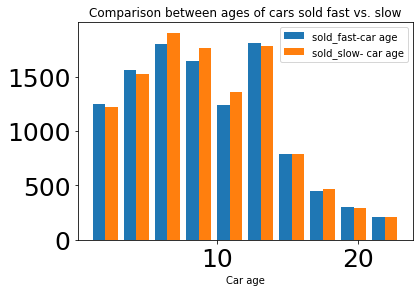

In [83]:
plt.hist([sold_fast.car_age.values.flatten(), sold_slow.car_age.values.flatten()], label=['sold_fast-car age', 'sold_slow- car age'])
plt.legend()
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)
plt.xlabel("Car age")
plt.title("Comparison between ages of cars sold fast vs. slow")

Text(0.5, 1.0, 'Comparison between types of cars sold fast vs. slow')

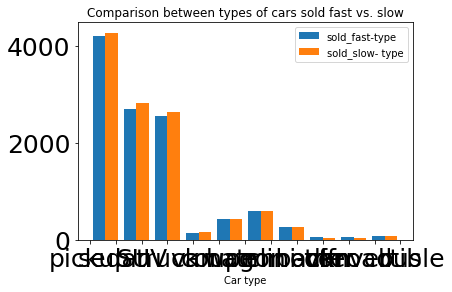

In [84]:
plt.hist([sold_fast.type.values.flatten(), sold_slow.type.values.flatten()], label=['sold_fast-type', 'sold_slow- type'])
plt.legend()
plt.rc('xtick', labelsize=5)
plt.rc('ytick', labelsize=25)
plt.xlabel("Car type")
plt.title("Comparison between types of cars sold fast vs. slow")

### conclusions-
The typical lifetime of an ad ranges between 19 and 53 days. The distribution of the amount of days listed is not normal and has a right tail (there are many ads posted for longer than 53, ranging all the way to 271 days).
In an attempt to find possible reasons to the difference between long-posted-ads and short-posted ones, i sub-setted the data according to quartile (Q1 and down compare to Q3 and up). After observing all mean values in the two sub-sets i decided there was no point running correlation tests, as they were all similar to one another (and N is similar as well). Histograms showing the distributions showed the same.
So in conclusion, i couldn't pin point a variable that could have contributed to the difference between long and short listed ads. (I assume that maybe if i would have defined the long and short time differently, i might have been able to find a difference).

## Average price per each type of vehicle

[Analyze the number of ads and the average price for each type of vehicle. Plot a graph showing the dependence of the number of ads on the vehicle type. Select the two types with the greatest number of ads.]

In [85]:
price_per_type =  cars_filtered.groupby(['type'])['price'].agg(['count', 'mean']).reset_index()
price_per_type

,type,count,mean
0,SUV,11250,10947.603822
1,bus,21,18107.428571
2,convertible,303,13133.976898
3,coupe,1803,13895.265668
4,hatchback,949,6899.492097
5,mini-van,1094,7917.734004
6,offroad,173,14734.635838
7,other,217,10575.815668
8,pickup,6055,15566.903386
9,sedan,11182,7041.553479


<AxesSubplot:xlabel='count', ylabel='mean'>

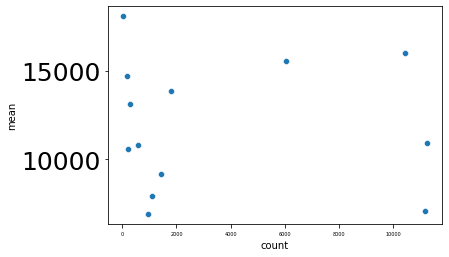

In [86]:
# scatterplot to see if there is any relation between amount of ads, grouped by type, and price.
sns.scatterplot(data=price_per_type, x="count", y="mean")

 I don't identify a clear relation: it looks like for most types of cars sellers post between 0-2000 ads, and the average price could be anywhere on the price range..

In [87]:
# The types of cars with the largest amount of ads are: sedan and SUV
top_types= price_per_type.sort_values(by='count', ascending=False).head(2)
top_types

,type,count,mean
0,SUV,11250,10947.603822
9,sedan,11182,7041.553479


<AxesSubplot:title={'center':'number of car ads by vehicle type'}, ylabel='count'>

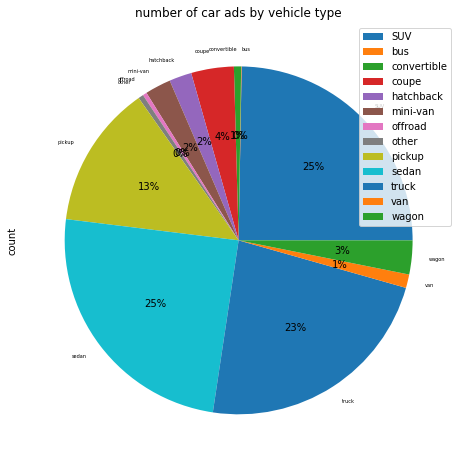

In [88]:
# plot showing the distribution of the number of ads, by the vehicle type
price_per_type.plot(y='count', kind='pie', figsize=(8,8), labels=price_per_type['type'], autopct='%1.0f%%', title= "number of car ads by vehicle type")



## Price factors

[What factors impact the price most? Take each of the popular types you detected at the previous stage and study whether the price depends on age, mileage, condition, transmission type, and color. For categorical variables (transmission type and color), plot box-and-whisker charts, and create scatterplots for the rest. When analyzing categorical variables, note that the categories must have at least 50 ads; otherwise, their parameters won't be valid for analysis.]

[Make use of correlation matrix and correlation plots]

In [89]:
#creating a dataset that includes only SUVs and Sedans:
top_list = list(price_per_type.sort_values(by='count', ascending=False).head(2)['type'])
df_top_2= cars_filtered[cars_filtered.type.isin(top_list)]
df_top_2.type.unique()

array(['SUV', 'sedan'], dtype=object)

### Investigating SUVs

In [90]:
# subsetting again for suv data only:
suv = df_top_2.query('type == "SUV"')
suv

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,...,year_posted,month_posted,model_year_filled,cylinders_filled,car_age,odometer_filled,paint_color_filled,is_4wd_filled,mileage_per_year,condition_category
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,...,2018,6,2011,6.0,8.0,145000.0,white,True,18125.000000,4
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,...,2019,1,2013,6.0,7.0,109473.0,black,True,15639.000000,2
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,...,2018,7,2012,4.0,7.0,104174.0,white,True,14882.000000,2
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,...,2019,2,2008,6.0,12.0,147191.0,blue,True,12265.916667,2
14,12990,2009.0,gmc yukon,excellent,8.0,gas,132285.0,automatic,SUV,black,...,2019,1,2009,8.0,11.0,132285.0,black,True,12025.909091,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51495,9500,2012.0,chevrolet traverse,good,6.0,gas,144500.0,automatic,SUV,NaN,...,2019,3,2012,6.0,8.0,144500.0,white,True,18062.500000,4
51496,4999,2002.0,toyota 4runner,excellent,6.0,gas,177901.0,automatic,SUV,NaN,...,2018,5,2002,6.0,17.0,177901.0,white,True,10464.764706,2
51500,6995,2012.0,buick enclave,excellent,6.0,gas,157000.0,automatic,SUV,white,...,2018,8,2012,6.0,7.0,157000.0,white,True,22428.571429,2
51502,7995,2011.0,chevrolet equinox,like new,4.0,gas,111088.0,automatic,SUV,NaN,...,2019,4,2011,4.0,9.0,111088.0,white,True,12343.111111,3


In [91]:
suv_subset1=suv[['price','odometer_filled', 'mileage_per_year','car_age', 'condition_category']]
suv_subset1

,price,odometer_filled,mileage_per_year,car_age,condition_category
0,9400,145000.0,18125.000000,8.0,4
7,15990,109473.0,15639.000000,7.0,2
8,11500,104174.0,14882.000000,7.0,2
9,9200,147191.0,12265.916667,12.0,2
14,12990,132285.0,12025.909091,11.0,2
...,...,...,...,...,...
51495,9500,144500.0,18062.500000,8.0,4
51496,4999,177901.0,10464.764706,17.0,2
51500,6995,157000.0,22428.571429,7.0,2
51502,7995,111088.0,12343.111111,9.0,3


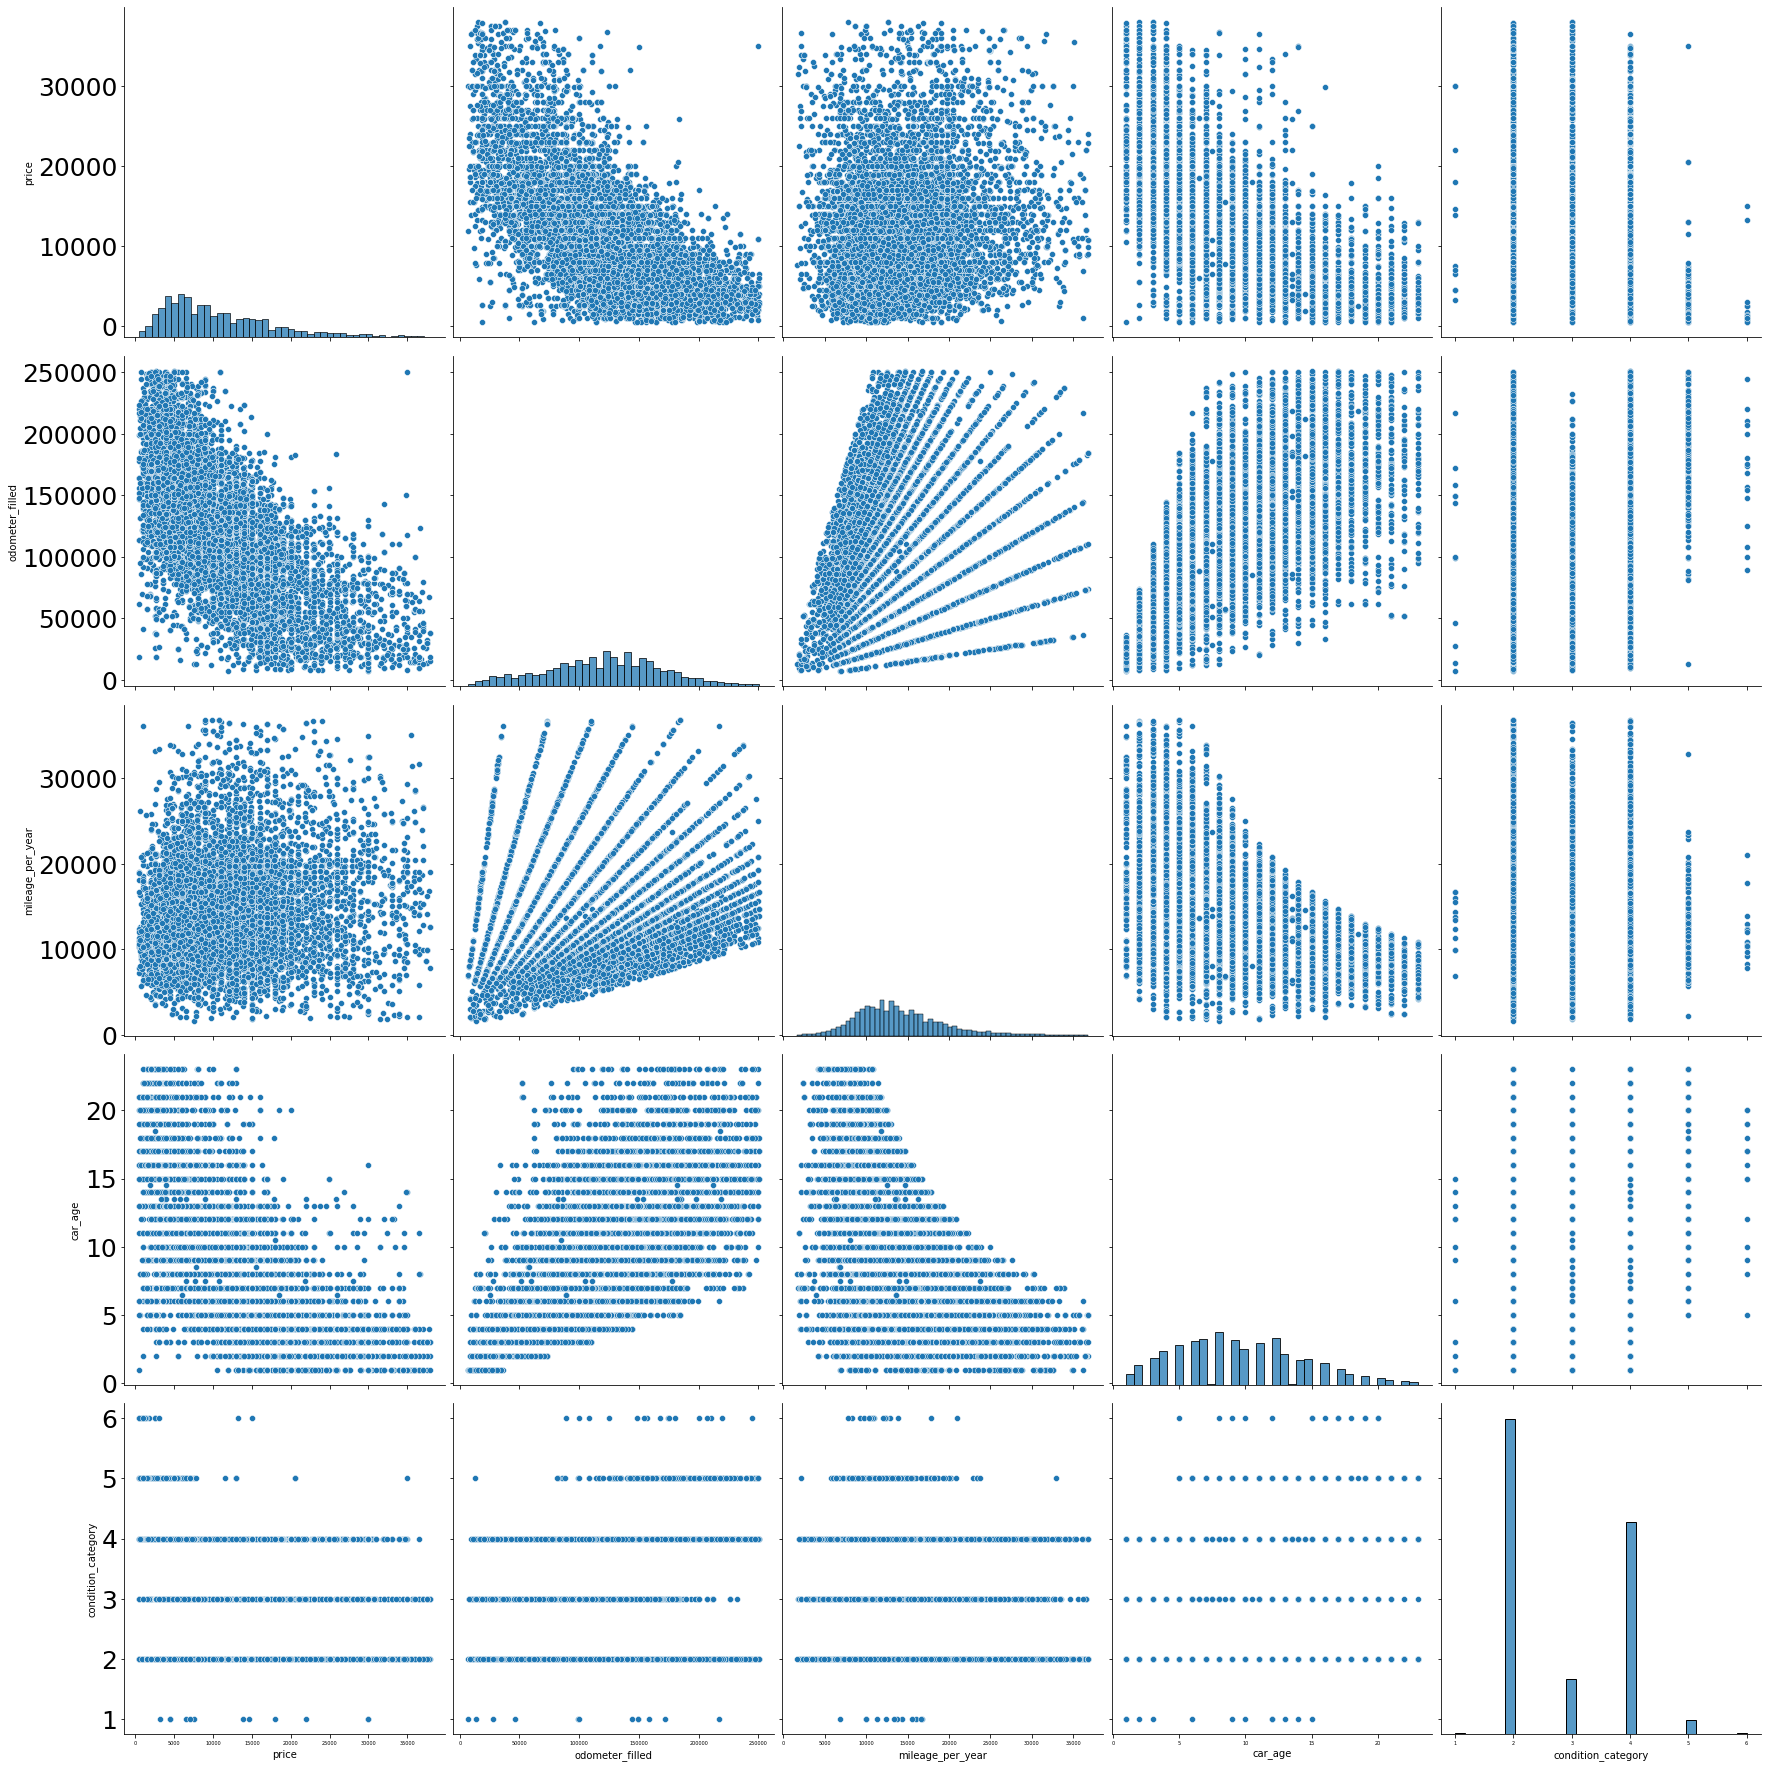

In [92]:
sns.pairplot(suv_subset1, height=5)


In [93]:
suv_subset1.corr()

,price,odometer_filled,mileage_per_year,car_age,condition_category
price,1.000000,-0.663442,0.204075,-0.654029,-0.223483
odometer_filled,-0.663442,1.000000,0.092401,0.685541,0.239220
mileage_per_year,0.204075,0.092401,1.000000,-0.555081,-0.067135
car_age,-0.654029,0.685541,-0.555081,1.000000,0.254544
condition_category,-0.223483,0.239220,-0.067135,0.254544,1.000000


### short summation- 
A medium size negative correlation was found between price and odometer, as well as between price and car age. A similar sized positive relation was found between car age and odometer. This means that old cars are more often cheaper than new cars, and cars that have a lot of mileages on them also tend to be cheaper than cars that don't. A lot of mileages are more often found in older, compared with newer, cars.
An interesting finding was that a measure that takes both age and odometer into account (mileage per year) was found to have a very weak positive relation with price, almost no relation with odometer and a weak negative relation with car age. Maybe we can conclude from these findings that although there is a general medium sized correlation between all cars' age and all cars' mileage, when looking at the intra-car relation there might be a non-linear one: in the same car low milage most often does not come with low age, and vice versa. Hence, maybe it's not the best measure (?) 
Regarding condition- there is a very weak negative relation with price. In general the histogram shows that the most common condition is "excelent"(2) and "good"(4), with "new" and "fair" not so common. Maybe self-definition of car-condition by car owners isn't that relible...

In [94]:
# for categorical variable:
suv_subset2 = suv[['transmission', 'paint_color_filled', 'price']]
suv_subset2

,transmission,paint_color_filled,price
0,automatic,white,9400
7,automatic,black,15990
8,automatic,white,11500
9,automatic,blue,9200
14,automatic,black,12990
...,...,...,...
51495,automatic,white,9500
51496,automatic,white,4999
51500,automatic,white,6995
51502,automatic,white,7995


In [95]:
# checking number of items in each cell: over 50
suv_subset2['transmission'].value_counts()

automatic    10715
manual         445
other           90
Name: transmission, dtype: int64

In [96]:
suv_subset2['paint_color_filled'].value_counts()

white     3802
black     1965
silver    1453
grey      1098
blue       942
red        838
green      380
brown      344
custom     269
orange      78
yellow      44
purple      37
Name: paint_color_filled, dtype: int64

In [97]:
# dropping colors that don't have at least 50 items
suv_subset2 = suv_subset2.query('paint_color_filled != "yellow" & paint_color_filled != "purple"')
suv_subset2['paint_color_filled'].value_counts()

white     3802
black     1965
silver    1453
grey      1098
blue       942
red        838
green      380
brown      344
custom     269
orange      78
Name: paint_color_filled, dtype: int64

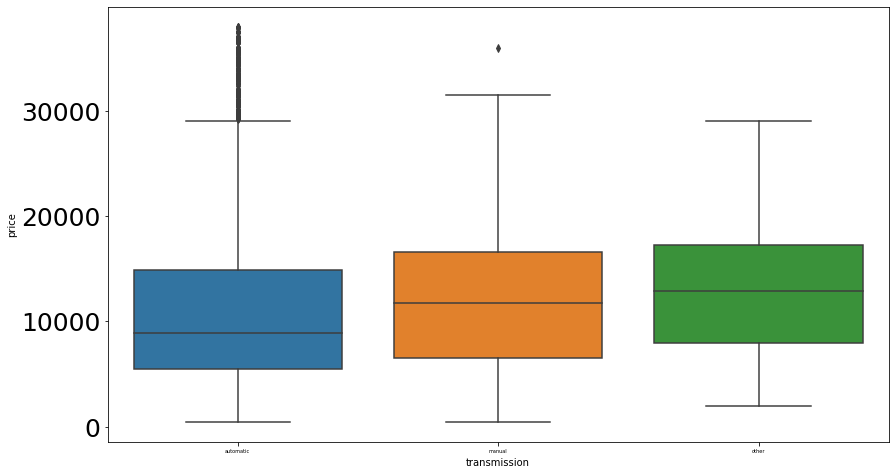

In [98]:
plt.figure(figsize=(14,8))
ax=sns.boxplot(x="transmission", y="price", data=suv_subset2)

In [99]:
suv_subset2.describe(include='all')

,transmission,paint_color_filled,price
count,11169,11169,11169.000000
unique,3,10,NaN
top,automatic,white,NaN
freq,10642,3802,NaN
mean,NaN,NaN,10946.559764
std,NaN,NaN,7290.986676
min,NaN,NaN,450.000000
25%,NaN,NaN,5499.000000
50%,NaN,NaN,8995.000000
75%,NaN,NaN,14990.000000


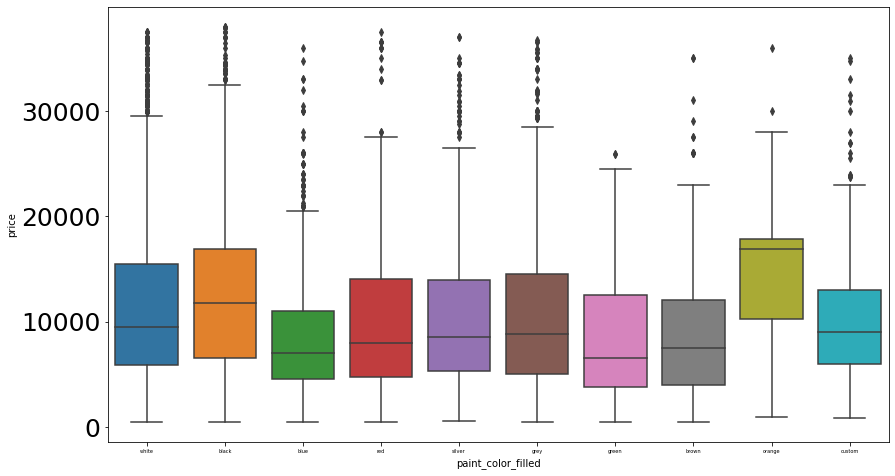

In [100]:
plt.figure(figsize=(14,8))
ax=sns.boxplot(x="paint_color_filled", y="price", data=suv_subset2)

### Discussing reults:
For categorical variables:
Transmission- In general, the price range across all transmission types seems to be similar, however the IQR is different. Automatic cars are more often a bit cheaper than manual and 'other' (perhaps hybrid or electric?)
Regarding color- Prices range greatly for most colors (long and tall wiskers), and most price medians are around 7000-8000. However, blue cars tend to be cheaper and prices vary less than for other colors (but with many outliers). Orange cars tend to be more expensive. White and black cars, that are the most common color, are priced at a medium-high range compared to other colors (of course, without knowing if there are sig differences).


### Investigating Sedan:

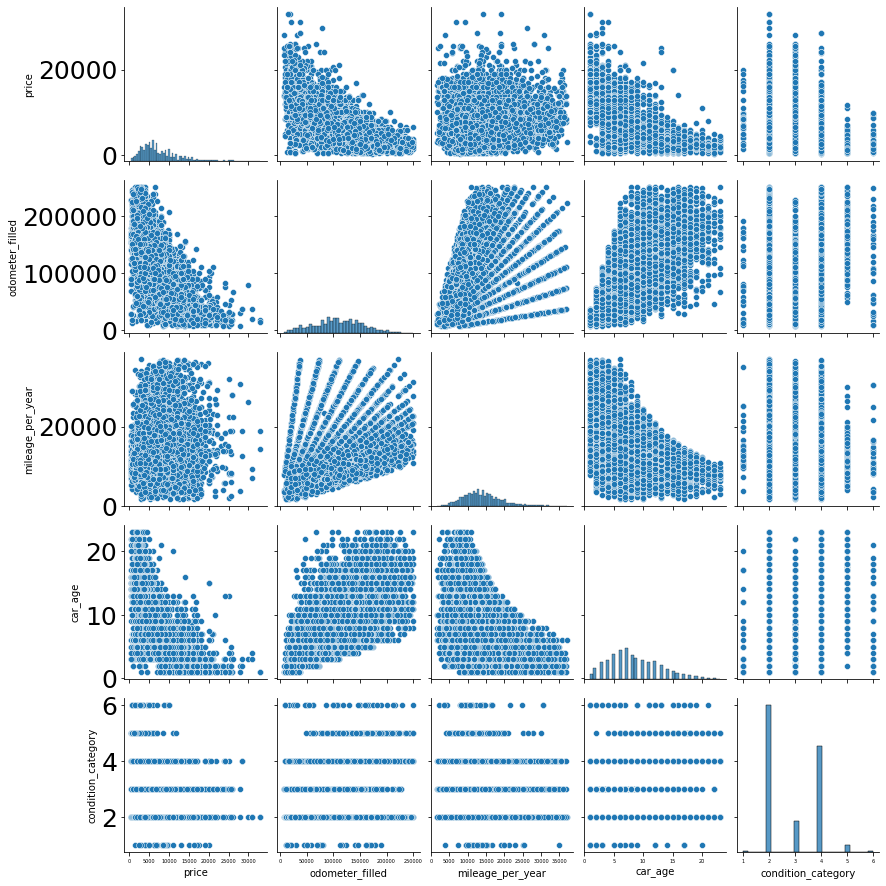

In [101]:
sedan = df_top_2.query('type == "sedan"')
sedan_subset1=sedan[['price','odometer_filled', 'mileage_per_year','car_age', 'condition_category']]
sns.pairplot(sedan_subset1)


In [102]:
sedan_subset1.corr()

,price,odometer_filled,mileage_per_year,car_age,condition_category
price,1.000000,-0.672914,0.173730,-0.681184,-0.259599
odometer_filled,-0.672914,1.000000,0.170761,0.667309,0.256109
mileage_per_year,0.173730,0.170761,1.000000,-0.507952,-0.039892
car_age,-0.681184,0.667309,-0.507952,1.000000,0.251471
condition_category,-0.259599,0.256109,-0.039892,0.251471,1.000000


### Short summation for Sedan:
- A similar relationship appears s seen for SUVs: a medium-high sized negative correlation between price and age, and between price a odometer. In both cases the graphs show a large variance of prices in the low odometer and low age.
- A medium-high positive correlaton between car age and odometer.
- In Sedans, as opposed to SUVs, mileage_per_year shows a possible stronger inner-correlation between age and milege, as can be infered from the medium sized negative corr between car age and mileage per year (older cars tend to show a smaller mileage per year count..(?)- this is strange since there isn't a corr with odometer.. maybe young cars drive a lot too, or there is a non-linear relationship). In the graphs it looks like a non-linear relationship between age and mileage per year (the linear part is until around 100000 mil.per.year.
- As in SUV: a small negative correlation was found between condition and price. Also, a smell positive one was found with odometer and car age.

In [103]:
# for categorical variable:
sedan_subset2 = sedan[['transmission', 'paint_color_filled', 'price']]
sedan_subset2['transmission'].value_counts()

automatic    10575
manual         540
other           67
Name: transmission, dtype: int64

In [104]:
sedan_subset2['paint_color_filled'].value_counts()

white     3370
silver    1906
black     1628
grey      1521
blue      1155
red        864
custom     253
brown      246
green      187
purple      23
yellow      20
orange       9
Name: paint_color_filled, dtype: int64

In [105]:
#removing colors that don't include at least 50 items:
sedan_subset2 = sedan_subset2.query('paint_color_filled != "yellow" & paint_color_filled != "purple" & paint_color_filled != "orange"')
sedan_subset2['paint_color_filled'].value_counts()

white     3370
silver    1906
black     1628
grey      1521
blue      1155
red        864
custom     253
brown      246
green      187
Name: paint_color_filled, dtype: int64

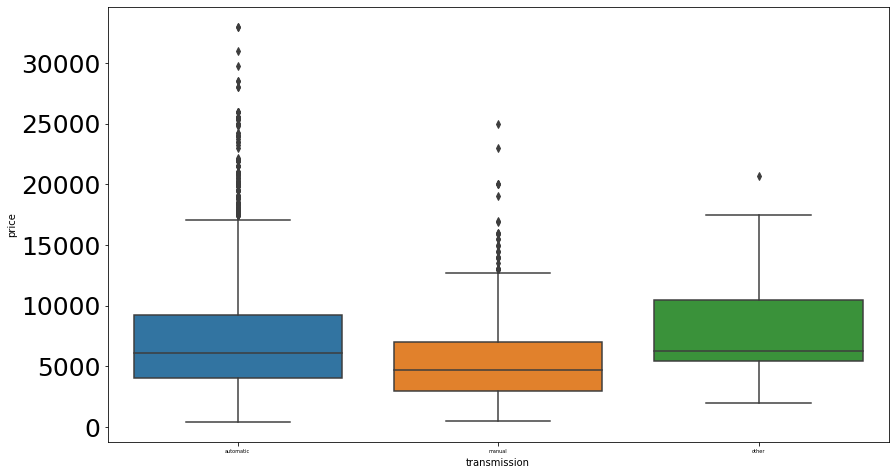

In [106]:
plt.figure(figsize=(14,8))
ax=sns.boxplot(x="transmission", y="price", data=sedan_subset2)

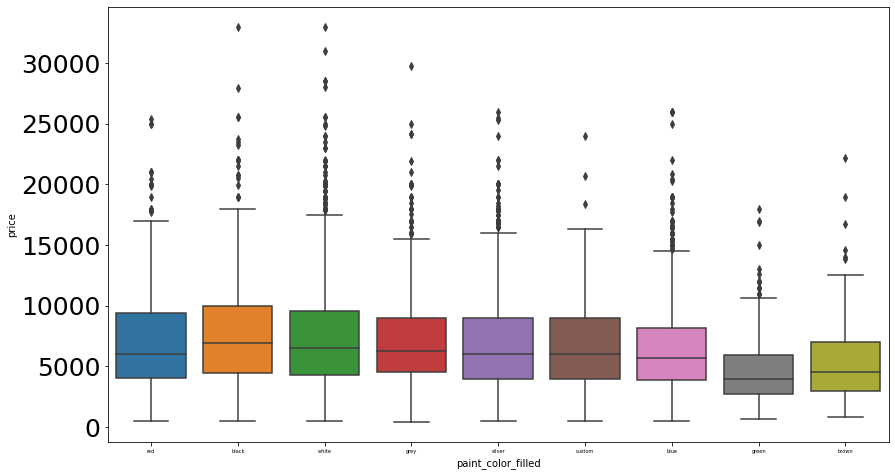

In [107]:
plt.figure(figsize=(14,8))
ax=sns.boxplot(x="paint_color_filled", y="price", data=sedan_subset2)

### concluding for categorical values in Sedan cars:
Transmission: This time, manual cars tend to be the cheaper cars, also with lower variance in price compared to the automatic cars. cars defined as "other" are priced similarly to automatic, but the price range is narrower.
Color- in Sedan the silver and black are most common. Pattern of results is very different than the one seen for SUVs.
For Sedan- The median price seems lower (around 6000), the IQR is narrower, and the whiskers don't stretch as much towards the higher prices, as seen in SUVs.Here the lowest prices are found for green cars, and maybe brown. and higher are for white, gray and black.

## General conclusion

[List your important conclusions in this final section, make sure they include those that led you to the way you processed and analyzed the data. Cover the missing values, duplicates, outliers and possible reasons and solutions for problematic artifacts that you had to address. Don't forget to remove all bracketed comments before submitting your project.]

This research was ordered by an advertising site that publishes free advertisements for vehicles every day. 
The study's aim was to identify the factors that influence cars' prices. Database included data collected from the site over a few years, regarding vehicles' price, model, year, mileage, number of cylinders, color, transmission, condition and how long the ad was active.
The analysis included a few stages:
- Preprocessing and dealing with missing values :
Missing values were found for 5 variables, ranging between 7% (model_year) and 50.37% (is_4wd).
Most missing values were filled using cross-referencing with relevant variables, and extracting means and medians. At the end of this process we were left with 51309 data rows, that comprised 99.58% of original data.

- Exploratory data analysis, including changing data types, where needed, identifying outliers in the data, removing them and creating relevant additional variables and sub-sets of data, to meet our needs.
Outliers were identified for the following variables using a cut-off point of 5th and 95th percentiles:
- price (bottom and top end of distribution)
- odometer (bottom and top ends of dis.)
- age (only the top end of the distributon).
The new filtered data (without outliers) included 34368 rows of data: 67% of the original data ( remark to myself and the reader- maybe i should have defined outliers in a more restrictive manner).
- Analyzing possible relationships between various factors and price, including checking for possible correlations and utilyzing visualization tools.
Results will be presented by factor (though there might be a joint-factor effect that was out of the scope of this analysis, and hence will not be presented).
1. NUMBER OF ADS per car type, and price: No relation was found between the number of ads posted per car type and the PRICE: car types could have many ads posted, with either high price or low price, and vice vers.
2. NUMBER OF DAYS the ad is listed: Half of the cars were sold within a period of 19 to 53 days, but some of them took over 270 days to get sold. Our analysis couldn't pin point the factors influencing the time it took a car to get sold: No sig differences were found between 25% of the ads, through which cars took a long time to be sold, and 25% of the ads, through which cars took a short time to get sold.
3. Number of ads posted and car type: A dependency was found between the number of ads and the car type. Two car types (SUV and SEDAN) were responsible for half of the ads posted on the site. For that reason, we chose these two car types to explore factors influencing the price. Sedans represnt cars from the lower car budget, while SUVs represent cars from the medium car budget. 
#In general, prices of SUVs were not only higher, but also the range of prices was wider compared to the Sedan cars. 
4. CAR AGE and ODOMETER: for both car types a medium-strong negative correlation was found with price. Older cars tend to have more milage on them and to be sold for lower prices, compared to new cars.
5. CONDITION: for both car types a weak negative correlation was found with price. Cars that were rated in a lower condition, usually were on the low range of prices. Also a similar positive corr was found with age and odometer- cars rated as being in a lower condition were more often old cars with more milage on them. It should be noted, though, that the condition is based on a self-report of the sellers, so there might be a positive bias there.
6. TRANSMISSION- for SUVs, it seemed that automatic cars tended to be a bit cheaper than manual or other ones. For SEDANs, howeve, the opposite pattern was found, with a narrower range of prices.
7. COLOR- for both car types there wasn't a significant relation between the color of the car and the price. Some colors were indeed cheaper or more expensive than others, but it seemed like an artifact of their low amount (orange for SUV, and green and brown for Sedan). The blue color, however, for SUVs, was found to be cheaper than other colors, for an unknown reason. 

In conclusion- these results are not so innovative :-) However, they suggest specific factors to look into when looking to buy a car. Also, they suggest that for some factors we can find a wide range of prices, and hence it might be wise not to haste or accept the first offer we get.

I would suggest to further explore the difference between cars being sold slowly and quickly.
Also, i would suggest to subset age and mileage into defined grops, to further understand at what point do prices start to drop.

Enjoy the ride ;-)
Lilach
